# Análise de sentimentos do Twitter com dados extraidor do dataset anotado tweetSentBR

O trabalho será realizando apenas com os dados balanaceados (undersampling)

### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados para treinamento do modelo

In [2]:
# carregando dataset
tweets_df = pd.read_csv('')

In [3]:
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,-1,test,tô passada com esse cara quanta merda pode sai...,False


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         15047 non-null  int64 
 1   hashtag    15047 non-null  object
 2   votes      15047 non-null  object
 3   hard       15047 non-null  int64 
 4   sentiment  15047 non-null  object
 5   group      15047 non-null  object
 6   text       15047 non-null  object
 7   repeat     15047 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 837.7+ KB


In [5]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
-,47,47,47,47,47,47,47
-1,4426,4426,4426,4426,4426,4426,4426
0,3926,3926,3926,3926,3926,3926,3926
1,6648,6648,6648,6648,6648,6648,6648


Como podemos observar, os dados estão desbalanceados e com algumas linhas apresentando a variável sentimento com o caracter traço '-'.

Para melhor trabalharmos com os dados, foi decidida a remoção dessas linhas.

In [6]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[ tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [7]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

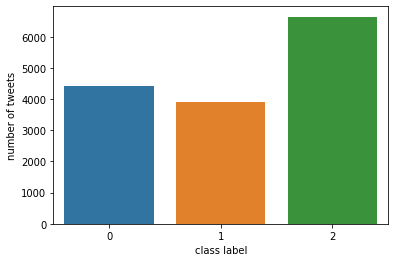

In [8]:
# Visualizando os dados graficamente
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

In [9]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426
1,3926,3926,3926,3926,3926,3926,3926
2,6648,6648,6648,6648,6648,6648,6648


## Efetuando a limpeza dos dados

In [10]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [11]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos


# Lematização

In [15]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-13 16:26:45.897932: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [17]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [18]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [19]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import simplemma
from simplemma import text_lemmatizer

In [21]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [22]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma,text_lemma_2
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador,irmão galvão adorar
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


## Trabalhando no equilibrio dos dados

### Iniciando o trabalho de balanceamento dos dados

In [23]:
minoria = tweets_df.loc[tweets_df['sentiment'] == 0]
meio = tweets_df.loc[tweets_df['sentiment'] == 1]
maioria = tweets_df.loc[tweets_df['sentiment'] == 2]

In [24]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6648

Meio 
3926

Minoria 
4426


## Igualar a quantidade de tweets entre positivo, negativo e neutro

### Undersampling (Criando datasets reorganizados para minoria)

In [25]:
from sklearn.utils import resample

maior_menor = resample(maioria, replace=True, n_samples=len(minoria), random_state=123)
meio_menor = resample(meio, replace=True, n_samples=len(minoria), random_state=123)

In [26]:
print(minoria.count(), meio_menor.count(), maior_menor.count())

id              4426
hashtag         4426
votes           4426
hard            4426
sentiment       4426
group           4426
text            4426
repeat          4426
text_clean      4426
text_lemma      4426
text_lemma_2    4426
dtype: int64 id              4426
hashtag         4426
votes           4426
hard            4426
sentiment       4426
group           4426
text            4426
repeat          4426
text_clean      4426
text_lemma      4426
text_lemma_2    4426
dtype: int64 id              4426
hashtag         4426
votes           4426
hard            4426
sentiment       4426
group           4426
text            4426
repeat          4426
text_clean      4426
text_lemma      4426
text_lemma_2    4426
dtype: int64


In [27]:
# juntando os dataframes
tweets_df_equilibrado_menor = pd.concat([minoria, meio_menor, maior_menor])

# resetando o index
tweets_df_equilibrado_menor = tweets_df_equilibrado_menor.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_menor.drop(columns=['index'], inplace=True)

In [28]:
tweets_df_equilibrado_menor.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat,text_clean,text_lemma,text_lemma_2
sentiment,,,,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426,4426,4426,4426
1,4426,4426,4426,4426,4426,4426,4426,4426,4426,4426
2,4426,4426,4426,4426,4426,4426,4426,4426,4426,4426


# Machine Learning - Utils

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import TfidfVectorizer

# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [30]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [31]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha=0.0001,
                                     loss='modified_huber', 
                                     penalty ='l2'))
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 2):
        modelo_nb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB(alpha=0.1))
        ])
        return modelo_nb_tfidf
    
    elif(pipe == 3):
        modelo_rf_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators=10))
        ])
        return modelo_rf_tfidf
    
    elif(pipe == 4):
        modelo_knn_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=1, 
                                            weights='uniform'))
        ])
        return modelo_knn_tfidf
    
    elif(pipe == 5):
        modelo_pa_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.03, 
                                                   loss= 'squared_hinge'))
        ])
        return modelo_pa_tfidf
    
    elif(pipe == 6):
        modelo_gb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', GradientBoostingClassifier(criterion='friedman_mse', 
                                                  learning_rate=0.2, 
                                                  max_depth=8, 
                                                  max_features='sqrt', 
                                                  n_estimators=10))
        ])
        return modelo_gb_tfidf
    
    elif(pipe == 7):
        modelo_xgb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', xgb.XGBClassifier(learning_rate=0.5, 
                                         max_depth=4, 
                                         objective='binary=hinge'))
        ])
        return modelo_xgb_tfidf
    
    elif(pipe == 8):
        modelo_mlp_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MLPClassifier(activation='relu', 
                                     alpha=0.05, 
                                     hidden_layer_sizes=(50, 100, 50), 
                                     learning_rate='constant', 
                                     solver='adam'))
        ])
        return modelo_mlp_tfidf
    
    elif(pipe == 9):
        modelo_lr_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 100.0, 
                                          penalty= 'l2'))
        ])
        return modelo_lr_tfidf
    
    elif(pipe == 10):
        modelo_svc_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C=10, 
                           gamma=1, 
                           kernel='rbf'))
        ])
        return modelo_svc_tfidf

In [32]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados Undersampling

In [34]:
X = tweets_df_equilibrado_menor['text_lemma_2']
y = tweets_df_equilibrado_menor['sentiment']

In [35]:
X.shape, y.shape

((13278,), (13278,))

### Separando dados para o treino e para o teste

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9958,), (9958,), (3320,), (3320,))

## Modelo 1 (TfidfVectorizer e SGDClassifier)

In [37]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train, y_train)
modelo1_pred_orig = modelo1_orig.predict(X_test)

In [38]:
modelo1_pred_orig

array([1, 1, 1, ..., 1, 2, 2])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      1113
           1       0.65      0.70      0.67      1091
           2       0.74      0.74      0.74      1116

    accuracy                           0.70      3320
   macro avg       0.70      0.70      0.70      3320
weighted avg       0.70      0.70      0.70      3320

Acurácia: 0.6979

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         734   239   140  1113
1         185   762   144  1091
2         121   174   821  1116
All      1040  1175  1105  3320 


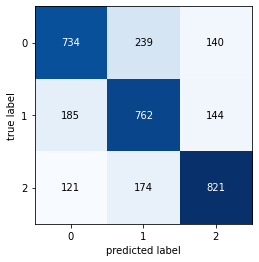

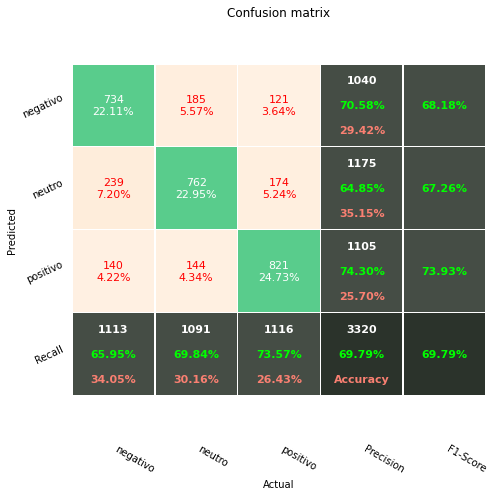

In [39]:
matriz_confusao(y_test, modelo1_pred_orig)

### Validação cruzada - modelo 1

In [40]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70      4426
           1       0.68      0.72      0.70      4426
           2       0.76      0.76      0.76      4426

    accuracy                           0.72     13278
   macro avg       0.72      0.72      0.72     13278
weighted avg       0.72      0.72      0.72     13278

Acurácia: 0.7216

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3014   874   538   4426
1         684  3199   543   4426
2         449   609  3368   4426
All      4147  4682  4449  13278 


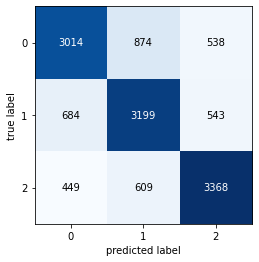

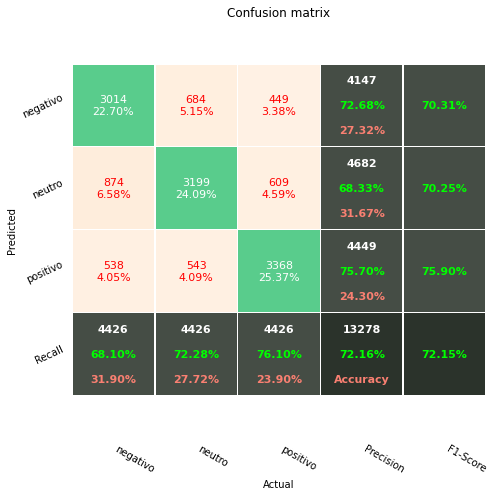

In [41]:
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e MultinomialNB)

In [42]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_orig.fit(X_train, y_train)
modelo2_pred_orig = modelo2_orig.predict(X_test)

In [43]:
modelo2_pred_orig

array([1, 1, 1, ..., 1, 2, 2])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67      1113
           1       0.65      0.61      0.63      1091
           2       0.70      0.73      0.71      1116

    accuracy                           0.67      3320
   macro avg       0.67      0.67      0.67      3320
weighted avg       0.67      0.67      0.67      3320

Acurácia: 0.6714

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         747   205   161  1113
1         235   669   187  1091
2         150   153   813  1116
All      1132  1027  1161  3320 


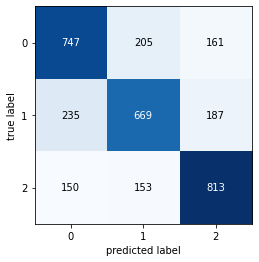

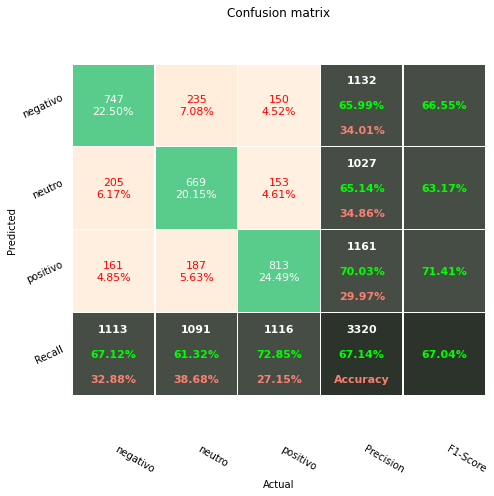

In [44]:
matriz_confusao(y_test, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [45]:
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      4426
           1       0.68      0.64      0.66      4426
           2       0.71      0.75      0.73      4426

    accuracy                           0.69     13278
   macro avg       0.69      0.69      0.69     13278
weighted avg       0.69      0.69      0.69     13278

Acurácia: 0.6938

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3091   751   584   4426
1         866  2819   741   4426
2         568   556  3302   4426
All      4525  4126  4627  13278 


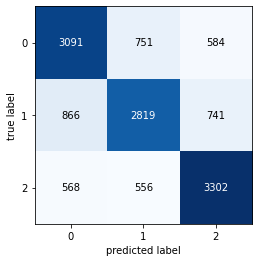

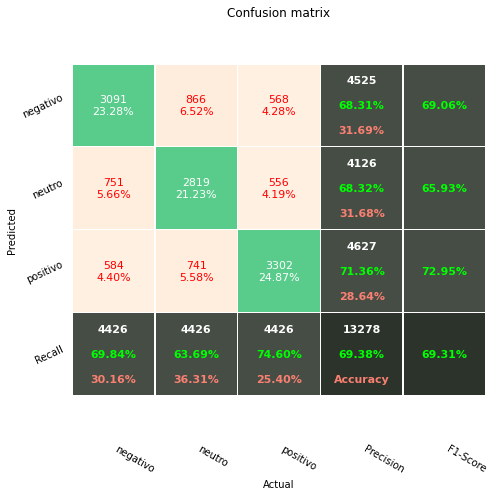

In [46]:
matriz_confusao(y, validacao_cruzada2)

## Modelo 3 (TfidfVectorizer e RandomForestClassifier)

In [47]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_orig.fit(X_train, y_train)
modelo3_pred_orig = modelo3_orig.predict(X_test)

In [48]:
modelo3_pred_orig

array([1, 0, 1, ..., 0, 2, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.65      0.67      1113
           1       0.65      0.77      0.70      1091
           2       0.79      0.71      0.74      1116

    accuracy                           0.71      3320
   macro avg       0.71      0.71      0.71      3320
weighted avg       0.71      0.71      0.71      3320

Acurácia: 0.7075

Matrix de confusão:
 Predito     0     1    2   All
Real                          
0         719   276  118  1113
1         154   843   94  1091
2         145   184  787  1116
All      1018  1303  999  3320 


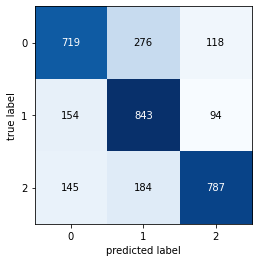

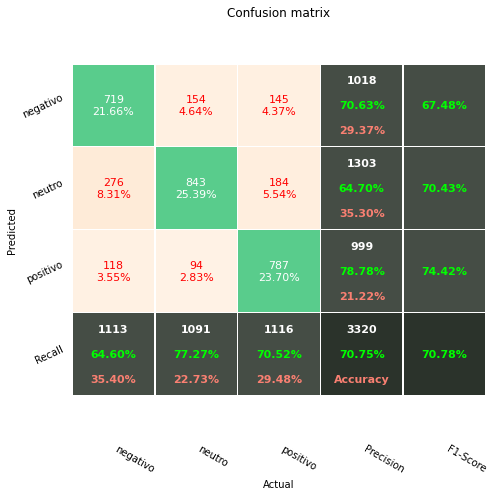

In [49]:
matriz_confusao(y_test, modelo3_pred_orig)

### Validação cruzada - modelo 3

In [50]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70      4426
           1       0.70      0.79      0.75      4426
           2       0.80      0.74      0.77      4426

    accuracy                           0.74     13278
   macro avg       0.74      0.74      0.74     13278
weighted avg       0.74      0.74      0.74     13278

Acurácia: 0.7393

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3008   905   513   4426
1         573  3518   335   4426
2         540   595  3291   4426
All      4121  5018  4139  13278 


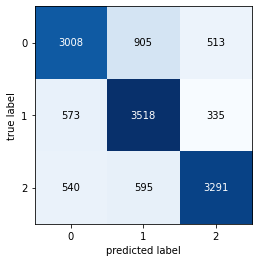

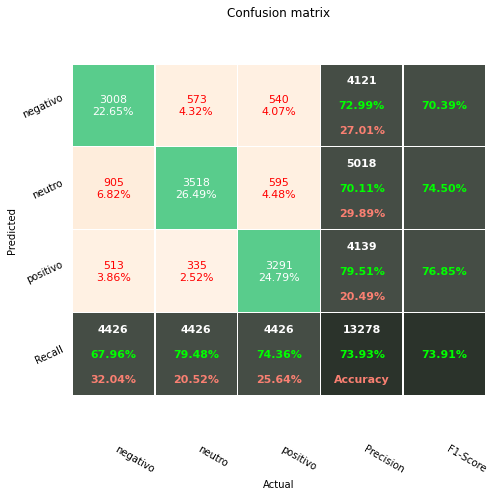

In [51]:
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e KNeighborsClassifier)

In [52]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_orig.fit(X_train, y_train)
modelo4_pred_orig = modelo4_orig.predict(X_test)

In [53]:
modelo4_pred_orig

array([0, 1, 1, ..., 1, 2, 1])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.21      0.32      1113
           1       0.44      0.90      0.59      1091
           2       0.83      0.58      0.68      1116

    accuracy                           0.56      3320
   macro avg       0.66      0.56      0.53      3320
weighted avg       0.66      0.56      0.53      3320

Acurácia: 0.5587

Matrix de confusão:
 Predito    0     1    2   All
Real                         
0        229   809   75  1113
1         50   982   59  1091
2         40   432  644  1116
All      319  2223  778  3320 


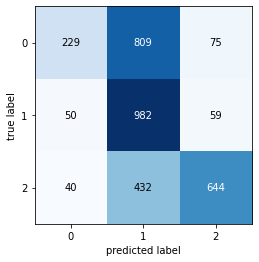

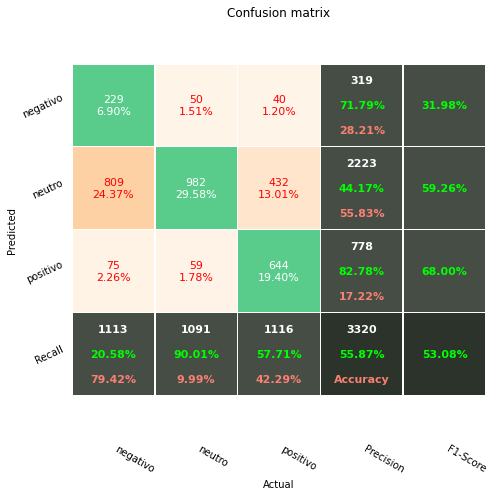

In [54]:
matriz_confusao(y_test, modelo4_pred_orig)

### Validação cruzada - modelo 4

In [55]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.80      0.69      4426
           1       0.74      0.71      0.73      4426
           2       0.85      0.61      0.71      4426

    accuracy                           0.71     13278
   macro avg       0.73      0.71      0.71     13278
weighted avg       0.73      0.71      0.71     13278

Acurácia: 0.7068

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3533   629   264   4426
1        1069  3163   194   4426
2        1264   473  2689   4426
All      5866  4265  3147  13278 


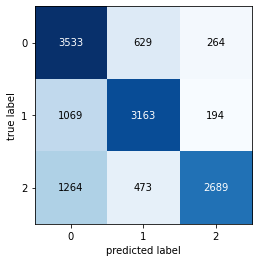

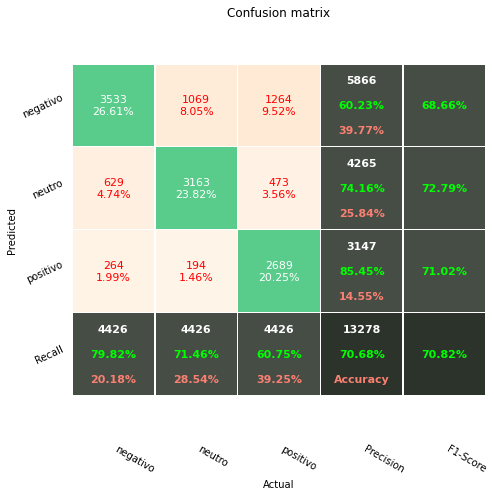

In [56]:
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (TfidfVectorizer e PassiveAggressiveClassifier)

In [57]:
modelo5_orig = escolher_pipeline(5)
modelo5_orig = modelo5_orig.fit(X_train, y_train)
modelo5_pred_orig = modelo5_orig.predict(X_test)

In [58]:
modelo5_pred_orig

array([1, 0, 1, ..., 1, 2, 2])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67      1113
           1       0.66      0.71      0.68      1091
           2       0.72      0.74      0.73      1116

    accuracy                           0.70      3320
   macro avg       0.70      0.70      0.70      3320
weighted avg       0.70      0.70      0.70      3320

Acurácia: 0.6964

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        702   242   169  1113
1        162   779   150  1091
2        117   168   831  1116
All      981  1189  1150  3320 


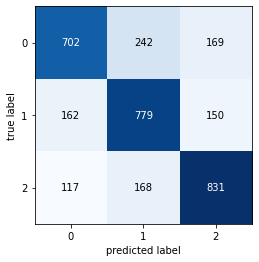

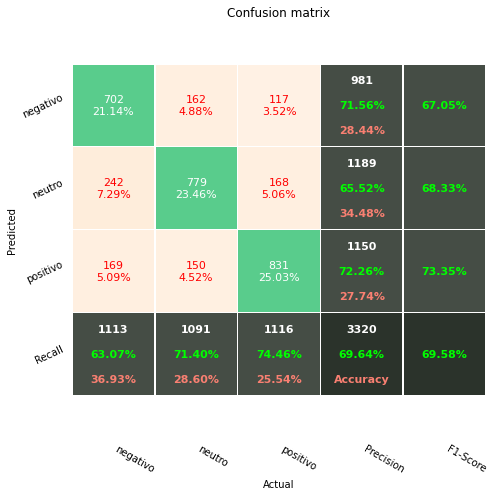

In [59]:
matriz_confusao(y_test, modelo5_pred_orig)

### Validação cruzada - modelo 5

In [60]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      4426
           1       0.69      0.75      0.72      4426
           2       0.76      0.76      0.76      4426

    accuracy                           0.73     13278
   macro avg       0.73      0.73      0.73     13278
weighted avg       0.73      0.73      0.73     13278

Acurácia: 0.7259

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2931   911   584   4426
1         609  3324   493   4426
2         439   603  3384   4426
All      3979  4838  4461  13278 


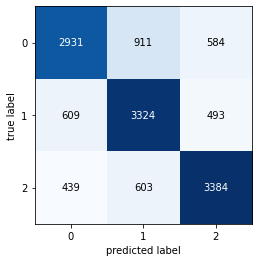

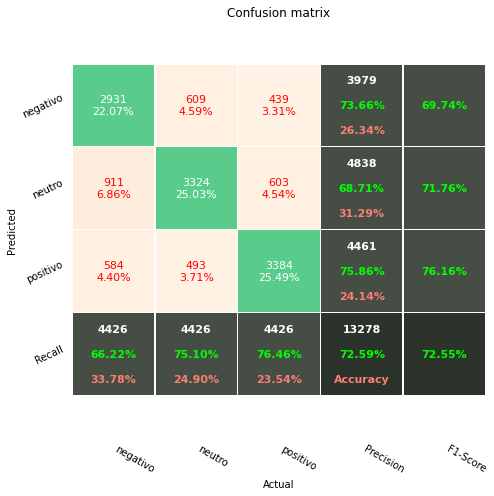

In [61]:
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (TfidfVectorizer e GradientBoostingClassifier)

In [62]:
modelo6_orig = escolher_pipeline(6)
modelo6_orig = modelo6_orig.fit(X_train, y_train)
modelo6_pred_orig = modelo6_orig.predict(X_test)

In [63]:
modelo6_pred_orig

array([1, 0, 1, ..., 1, 2, 1])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.58      0.46      0.51      1113
           1       0.46      0.74      0.56      1091
           2       0.71      0.43      0.54      1116

    accuracy                           0.54      3320
   macro avg       0.58      0.54      0.54      3320
weighted avg       0.58      0.54      0.54      3320

Acurácia: 0.5416

Matrix de confusão:
 Predito    0     1    2   All
Real                         
0        510   478  125  1113
1        213   803   75  1091
2        155   476  485  1116
All      878  1757  685  3320 


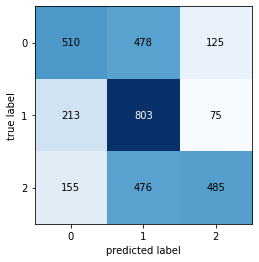

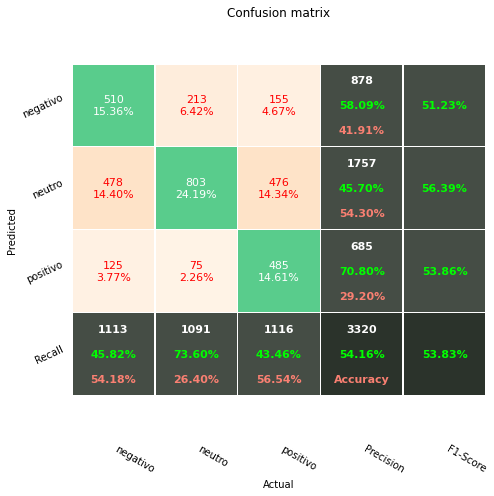

In [64]:
matriz_confusao(y_test, modelo6_pred_orig)

### Validação cruzada - modelo 6

In [65]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.47      0.53      4426
           1       0.46      0.71      0.56      4426
           2       0.68      0.45      0.54      4426

    accuracy                           0.54     13278
   macro avg       0.58      0.54      0.54     13278
weighted avg       0.58      0.54      0.54     13278

Acurácia: 0.5441

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2085  1842   499   4426
1         854  3134   438   4426
2         537  1883  2006   4426
All      3476  6859  2943  13278 


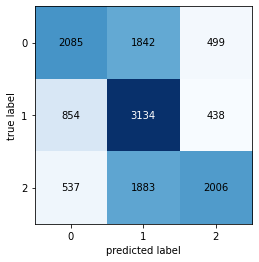

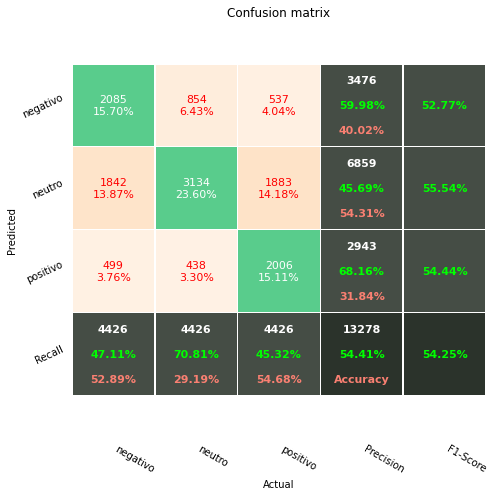

In [66]:
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (TfidfVectorizer e XGBClassifier)

In [67]:
modelo7_orig = escolher_pipeline(7)
modelo7_orig = modelo7_orig.fit(X_train, y_train)
modelo7_pred_orig = modelo7_orig.predict(X_test)

In [68]:
modelo7_pred_orig

array([1, 0, 1, ..., 1, 2, 1])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      0.55      0.61      1113
           1       0.55      0.75      0.64      1091
           2       0.73      0.62      0.67      1116

    accuracy                           0.64      3320
   macro avg       0.66      0.64      0.64      3320
weighted avg       0.66      0.64      0.64      3320

Acurácia: 0.6413

Matrix de confusão:
 Predito    0     1    2   All
Real                         
0        617   357  139  1113
1        161   818  112  1091
2        119   303  694  1116
All      897  1478  945  3320 


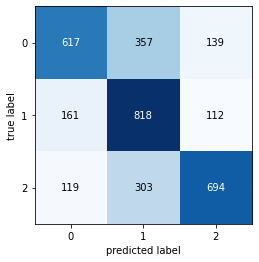

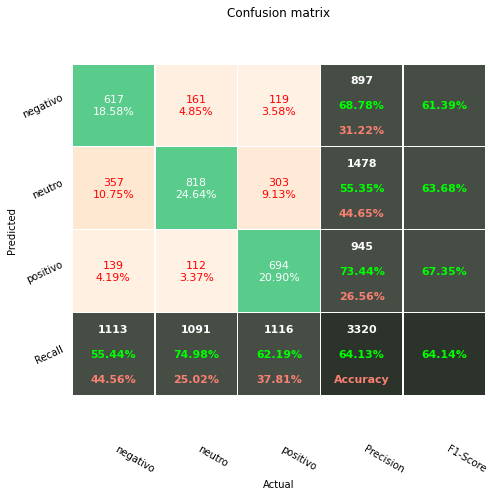

In [69]:
matriz_confusao(y_test, modelo7_pred_orig)

### Validação cruzada - modelo 7

In [70]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64      4426
           1       0.57      0.76      0.65      4426
           2       0.76      0.63      0.69      4426

    accuracy                           0.66     13278
   macro avg       0.68      0.66      0.66     13278
weighted avg       0.68      0.66      0.66     13278

Acurácia: 0.6588

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2593  1381   452   4426
1         655  3365   406   4426
2         455  1182  2789   4426
All      3703  5928  3647  13278 


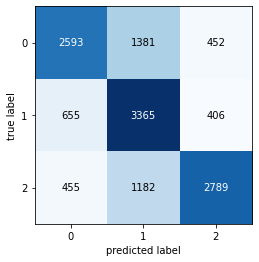

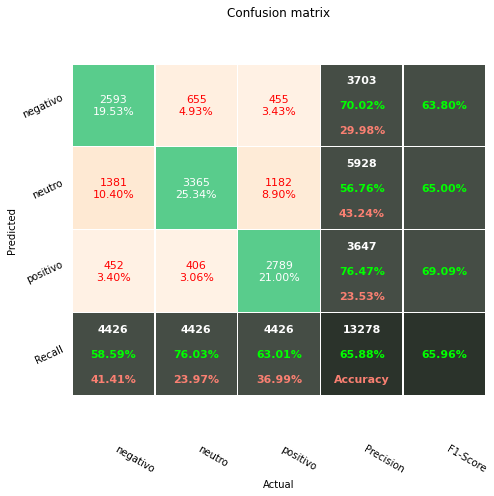

In [71]:
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (TfidfVectorizer e MLPClassifier)

In [72]:
modelo8_orig = escolher_pipeline(8)
modelo8_orig = modelo8_orig.fit(X_train, y_train)
modelo8_pred_orig = modelo8_orig.predict(X_test)

In [73]:
modelo8_pred_orig

array([1, 0, 1, ..., 0, 2, 2])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.62      0.66      1113
           1       0.68      0.73      0.70      1091
           2       0.73      0.78      0.76      1116

    accuracy                           0.71      3320
   macro avg       0.71      0.71      0.71      3320
weighted avg       0.71      0.71      0.71      3320

Acurácia: 0.7084

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        686   241   186  1113
1        169   791   131  1091
2        102   139   875  1116
All      957  1171  1192  3320 


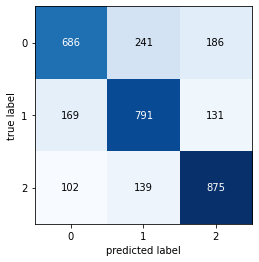

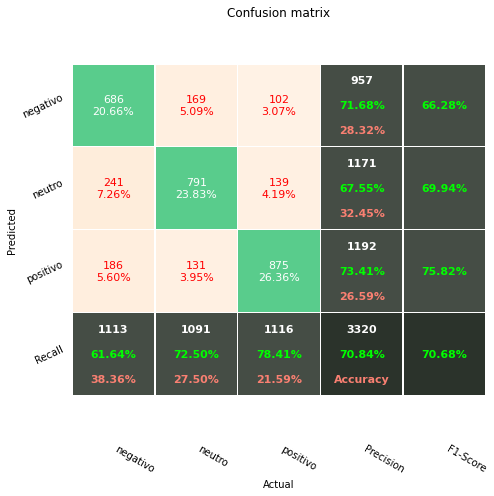

In [74]:
matriz_confusao(y_test, modelo8_pred_orig)

### Validação cruzada - modelo 8

In [75]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71      4426
           1       0.71      0.80      0.75      4426
           2       0.78      0.78      0.78      4426

    accuracy                           0.75     13278
   macro avg       0.75      0.75      0.75     13278
weighted avg       0.75      0.75      0.75     13278

Acurácia: 0.7473

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2953   894   579   4426
1         501  3527   398   4426
2         430   553  3443   4426
All      3884  4974  4420  13278 


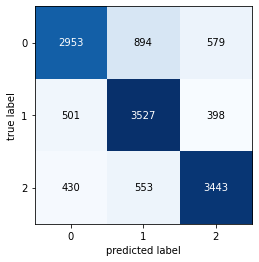

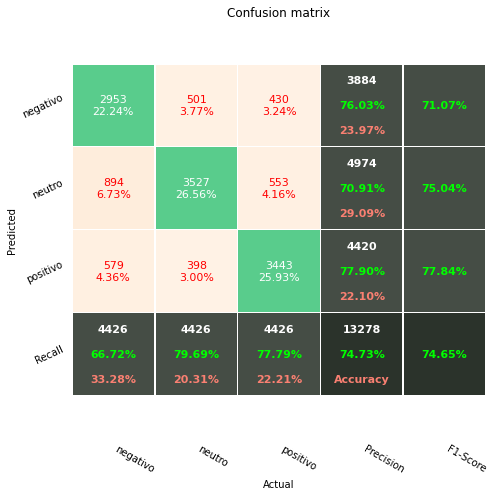

In [76]:
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (TfidfVectorizer e LogisticRegression)

In [77]:
modelo9_orig = escolher_pipeline(9)
modelo9_orig = modelo9_orig.fit(X_train, y_train)
modelo9_pred_orig = modelo9_orig.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [78]:
modelo9_pred_orig

array([1, 0, 1, ..., 1, 2, 2])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.64      0.67      1113
           1       0.64      0.71      0.68      1091
           2       0.74      0.74      0.74      1116

    accuracy                           0.70      3320
   macro avg       0.70      0.70      0.70      3320
weighted avg       0.70      0.70      0.70      3320

Acurácia: 0.6964

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        708   253   152  1113
1        171   780   140  1091
2        114   178   824  1116
All      993  1211  1116  3320 


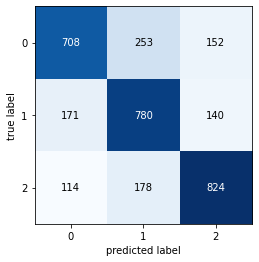

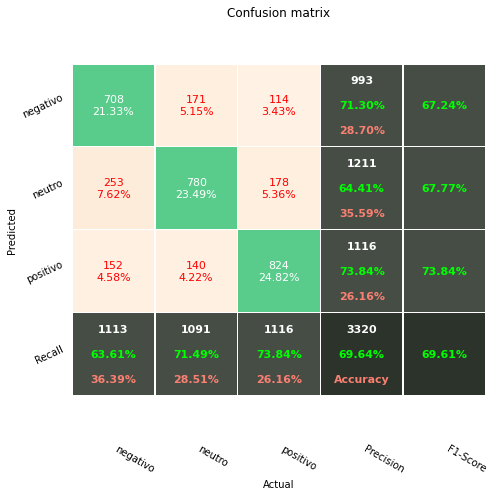

In [79]:
matriz_confusao(y_test, modelo9_pred_orig)

### Validação cruzada - modelo 9

In [80]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      4426
           1       0.68      0.76      0.72      4426
           2       0.76      0.76      0.76      4426

    accuracy                           0.73     13278
   macro avg       0.73      0.73      0.72     13278
weighted avg       0.73      0.73      0.72     13278

Acurácia: 0.7253

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2915   941   570   4426
1         602  3342   482   4426
2         434   619  3373   4426
All      3951  4902  4425  13278 


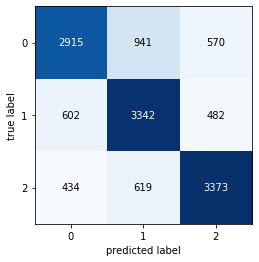

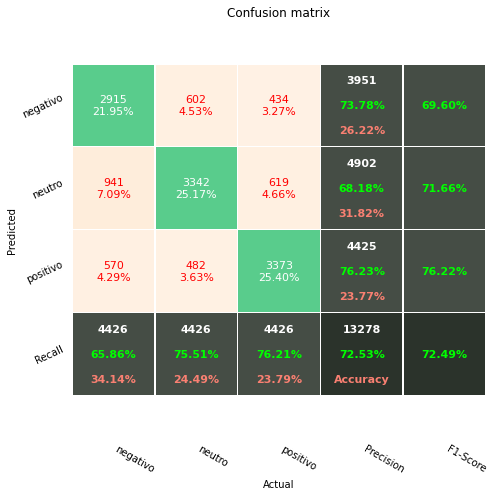

In [81]:
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (TfidfVectorizer e SVC)

In [82]:
modelo10_orig = escolher_pipeline(10)
modelo10_orig = modelo10_orig.fit(X_train, y_train)
modelo10_pred_orig = modelo10_orig.predict(X_test)

In [83]:
modelo10_pred_orig

array([1, 0, 1, ..., 1, 2, 1])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      1113
           1       0.72      0.74      0.73      1091
           2       0.80      0.77      0.79      1116

    accuracy                           0.74      3320
   macro avg       0.74      0.74      0.74      3320
weighted avg       0.74      0.74      0.74      3320

Acurácia: 0.7431

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         802   186   125  1113
1         196   803    92  1091
2         130   124   862  1116
All      1128  1113  1079  3320 


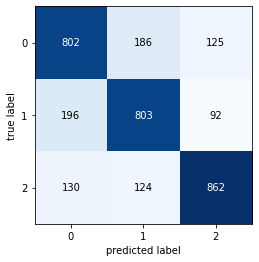

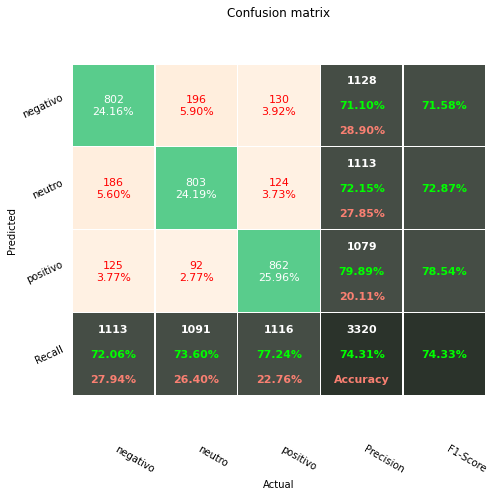

In [84]:
matriz_confusao(y_test, modelo10_pred_orig)

### Validação cruzada - modelo 10

In [85]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      4426
           1       0.76      0.78      0.77      4426
           2       0.82      0.79      0.81      4426

    accuracy                           0.78     13278
   macro avg       0.78      0.78      0.78     13278
weighted avg       0.78      0.78      0.78     13278

Acurácia: 0.7767

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3352   669   405   4426
1         601  3457   368   4426
2         495   427  3504   4426
All      4448  4553  4277  13278 


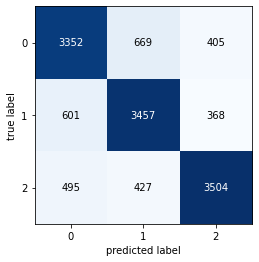

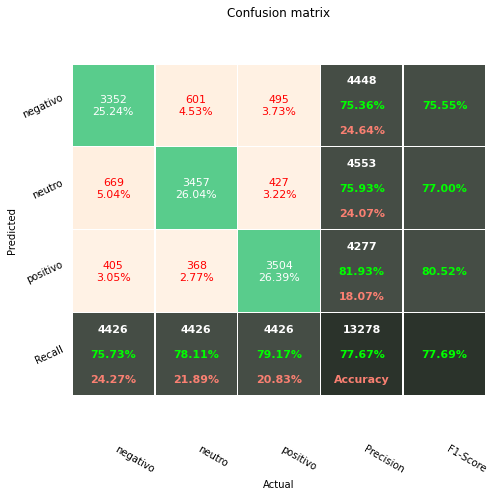

In [86]:
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [87]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test, modelo1_pred_orig, output_dict=True)
report2 = metrics.classification_report(y_test, modelo2_pred_orig, output_dict=True)
report3 = metrics.classification_report(y_test, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test, modelo10_pred_orig, output_dict=True)

In [88]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [89]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy


In [90]:
# criando a lista com o modelos de classificação
modelos = ['SGD_Tfidf',
            'MultinomialNB_Tfidf',
            'RandomForest_Tfidf',
            'KNeighbors_Tfidf',
            'PassiveAggressive_Tfidf',
            'GradientBoosting_Tfidf',
            'XGB_Tfidf',
            'MLP_Tfidf',
            'LogisticRegression_Tfidf',
            'SVC_Tfidf']

In [91]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report2,
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [92]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['accuracy'], 2)] 

In [96]:
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy
9,SVC_Tfidf,0.71,0.72,0.80,0.72,0.74,0.77,0.72,0.73,0.79,0.74
2,RandomForest_Tfidf,0.71,0.65,0.79,0.65,0.77,0.71,0.67,0.70,0.74,0.71
7,MLP_Tfidf,0.72,0.68,0.73,0.62,0.73,0.78,0.66,0.70,0.76,0.71
0,SGD_Tfidf,0.71,0.65,0.74,0.66,0.70,0.74,0.68,0.67,0.74,0.70
4,PassiveAggressive_Tfidf,0.72,0.66,0.72,0.63,0.71,0.74,0.67,0.68,0.73,0.70
8,LogisticRegression_Tfidf,0.71,0.64,0.74,0.64,0.71,0.74,0.67,0.68,0.74,0.70
1,MultinomialNB_Tfidf,0.66,0.65,0.70,0.67,0.61,0.73,0.67,0.63,0.71,0.67
6,XGB_Tfidf,0.69,0.55,0.73,0.55,0.75,0.62,0.61,0.64,0.67,0.64
3,KNeighbors_Tfidf,0.72,0.44,0.83,0.21,0.90,0.58,0.32,0.59,0.68,0.56
5,GradientBoosting_Tfidf,0.58,0.46,0.71,0.46,0.74,0.43,0.51,0.56,0.54,0.54


In [97]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
# salvando o relatório consolidado em excel
report_df.to_excel("repost_under_tfidf.xlsx")